In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable, List, Dict, Any, Set, FrozenSet, Iterable, Tuple
import math
import random
import networkx as nx

import pandas as pd
import os
import galois

from TCd_decoder import *


# $Z_3$ toric code theshold
* As a warm up for qudit subsytem codes lets test the performance of our HDRG decoder on qutrit toric code on a square lattice
* Relevant functions are contained in TCd_decoder.py

In [2]:
GF =galois.GF(3)

## Lets visualize errors in the code:

In [4]:
code = TCd(15,15)
code.generate_code()

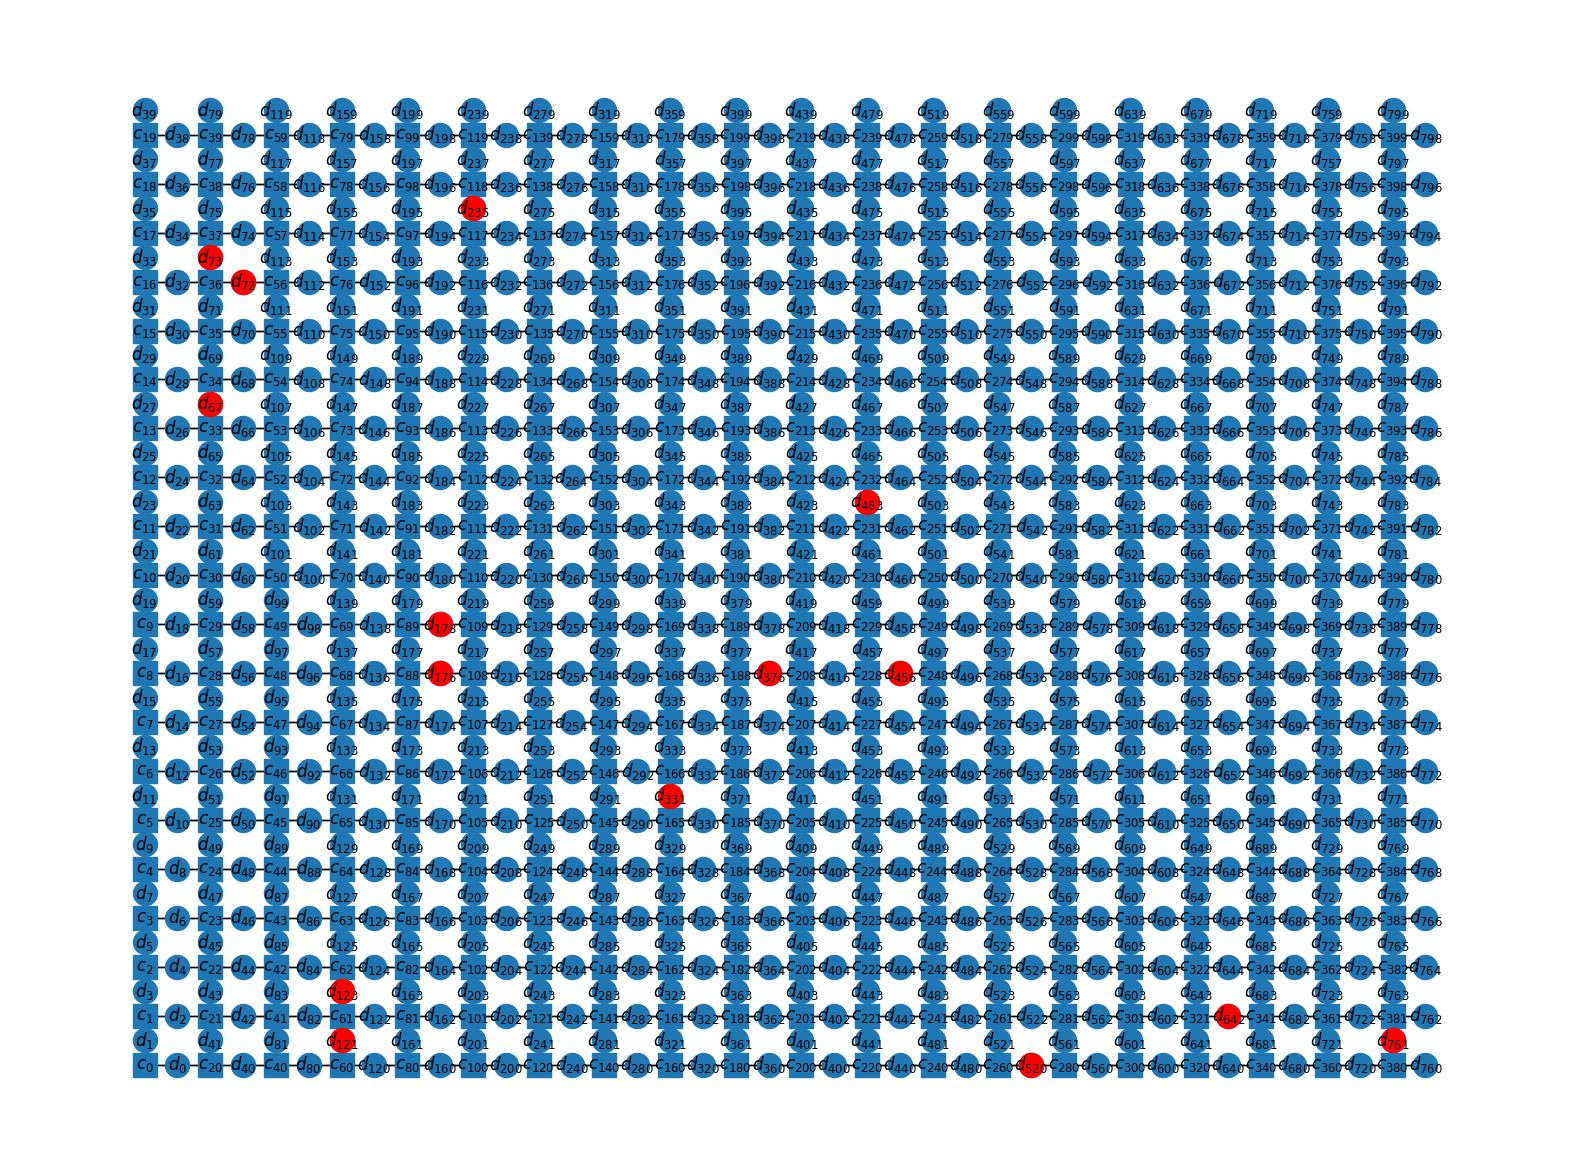

In [47]:
error = GF(Error(.01, code.H))

draw_tanner_graph(code.T, mi2s([i for i,s in enumerate(error) if s!=0]))

## Let's test the decoder
* Noise model is $P(X) = p = P(X^2)$

In [33]:
threshhold_dict = {}
N_list = [8,14,20]
p_list = [.005, .01, .02,.03, .04,.06]

for L in N_list:
    threshhold_dict[L] = []

In [42]:
runs = 2*10**3

for N in N_list:
    
    for p in p_list:
        code = TCd(N,N)
        code.generate_code()
        logical_success = 0
 

        for run in range(runs):
            error = GF(Error(p,code.H))
            e_corr, syndrome_after_decoding = my_decoder(code.T, error)

            if (error - e_corr)@ GF(code.Z1) ==0 and (error - e_corr)@ GF(code.Z2) ==0:
                logical_success+=1

            if run % int(runs/5)==0:
                print(f'done with run {run} for {[N,p]} and failure rate is {1-logical_success/(run+1)}')

        threshhold_dict[N].append(logical_success/runs)
        print('===============================')

#for run in range(runs)

done with run 0 for [8, 0.03] and failure rate is 0.0
done with run 400 for [8, 0.03] and failure rate is 0.16708229426433918
done with run 800 for [8, 0.03] and failure rate is 0.1710362047440699
done with run 1200 for [8, 0.03] and failure rate is 0.18734388009991676
done with run 1600 for [8, 0.03] and failure rate is 0.19362898188632105
done with run 0 for [8, 0.04] and failure rate is 1.0
done with run 400 for [8, 0.04] and failure rate is 0.2917705735660848
done with run 800 for [8, 0.04] and failure rate is 0.317103620474407
done with run 1200 for [8, 0.04] and failure rate is 0.32306411323896755
done with run 1600 for [8, 0.04] and failure rate is 0.3266708307307933
done with run 0 for [8, 0.06] and failure rate is 1.0
done with run 400 for [8, 0.06] and failure rate is 0.6359102244389028
done with run 800 for [8, 0.06] and failure rate is 0.6429463171036205
done with run 1200 for [8, 0.06] and failure rate is 0.6203164029975021
done with run 1600 for [8, 0.06] and failure rate

Text(0.5, 1.0, 'Z3 toric code theshhold iid noise: P(1) =1-2p, P(X) = P(X^2) = p')

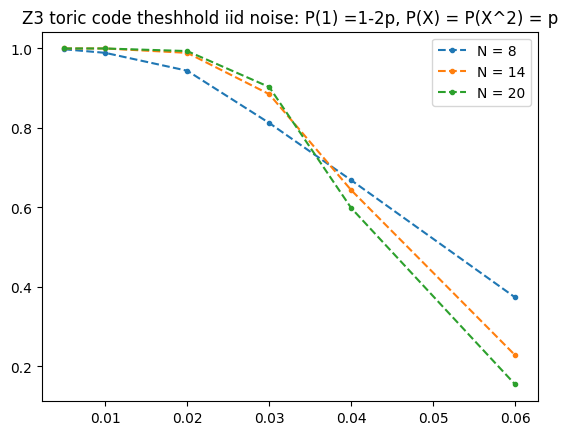

In [44]:
p_list = [.005, .01, .02,.03, .04,.06]

for N in N_list:
    plt.plot(p_list, threshhold_dict[N], '.--', label = f'N = {N}')
plt.legend()
plt.title(f'Z3 toric code theshhold iid noise: P(1) =1-2p, P(X) = P(X^2) = p')